In [25]:
from radiotime import fitACF 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import correlate

Create a horrible hypothetical pulse:

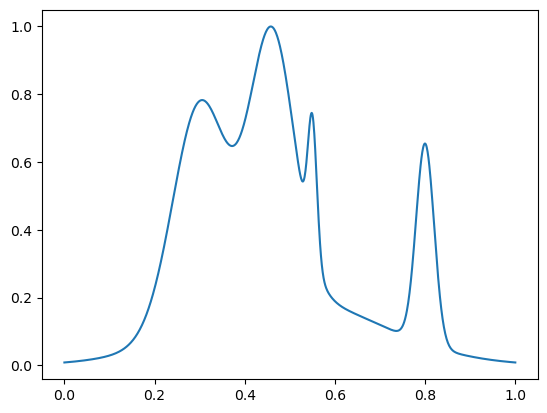

In [22]:
def gaussian(x, sig, mu):

    curve = np.exp(-0.5*((x - mu)/sig)**2)/(sig*np.sqrt(2*np.pi))

    return curve

phi = np.linspace(0, 1, 1024)
prof = gaussian(phi, 0.2, 0.5) + 0.1*gaussian(phi, 0.01, 0.55) + gaussian(phi, 0.05, 0.46)
prof += gaussian(phi, 0.06, .3) + 0.3*gaussian(phi, 0.02, 0.8)
prof /= max(prof)

plt.plot(phi, prof)

Use `scipy.signal` to take the ACF:

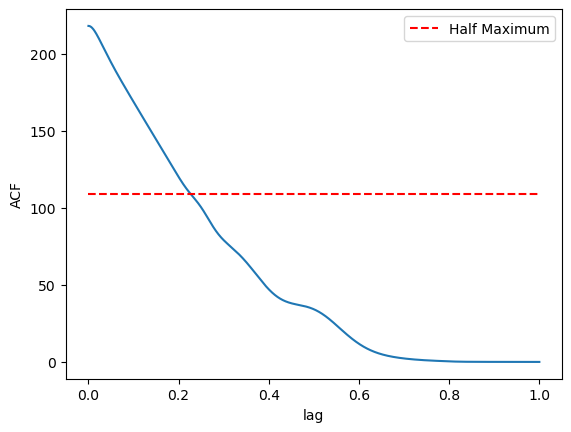

In [74]:
acf = correlate(prof, prof)[len(prof)-1:]
lag = np.linspace(0, 1, len(acf))
hwhm_idx = np.where(np.cumsum(acf) >= 0.5 * np.sum(acf))[0][0]
hwhm = lag[hwhm_idx]
plt.plot(lag, acf)
plt.hlines(0.5*max(acf), min(lag), max(lag), 'r', linestyle = '--', label = 'Half Maximum')
plt.xlabel('lag')
plt.ylabel('ACF')
plt.legend()

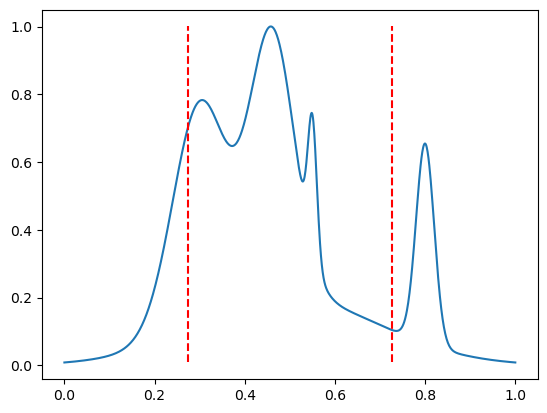

In [57]:
fwhm = 2 *hwhm
center_idx = int(len(phi) / 2)
plt.plot(phi, prof)
plt.vlines(phi[center_idx - hwhm_idx], min(prof), max(prof), 'r', linestyle = '--')
plt.vlines(phi[center_idx + hwhm_idx], min(prof), max(prof), 'r', linestyle = '--')

Now let's check that we are correctly retrieving the FWHMs of pure Gaussians:

In [98]:
prof2 = gaussian(phi, 0.01, 0.5)
prof3 = gaussian(phi, 0.1, 0.5)

prof2 /= max(prof2)
prof3 /= max(prof3)

In [93]:
def get_fwhm(phi, prof):

    acf = correlate(prof, prof)[len(prof)-1:]
    hwhm_idx = np.where(acf <= 0.5*acf[0])[0][0]
    hwhm = phi[hwhm_idx]
    fwhm = 2*hwhm / np.sqrt(2)

    return fwhm, hwhm_idx

In [97]:
fwhm2, hwhm_idx2 = get_fwhm(phi, prof2)
fwhm3, hwhm_idx3 = get_fwhm(phi, prof3)

print(f'Expected FWHM of Prof2 and Prof3: {np.round(2.355*0.01, 3)} & {np.round(2.355*0.1, 3)}')
print(f'Retrieved FWHM of Prof1 and Prof2: {np.round(fwhm2, 3)} & {np.round(fwhm3, 3)}')
print('Yay!')

Expected FWHM of Prof2 and Prof3: 0.024 & 0.236
Retrieved FWHM of Prof1 and Prof2: 0.025 & 0.236
Yay!
